# Get Immutable Reference Benchmarks

In [3]:
# select measurement file
#file_name = "../output/2024-05-22 10-14-20 get1.json"
file_name = "../output/2024-11-12 21-29-27 full.json"

# select style options
grey_fill_between = False

enable_storage_reference = False

if grey_fill_between:
    fill_between_args = {"color": "grey"}
else:
    fill_between_args = {}

In [4]:
# parse data
import json

with open(file_name) as file:
    raw_data = json.load(file)

In [5]:
from util.convert import convert_data
from IPython.core.display import HTML

# filter and convert data
get_min = convert_data(raw_data, "get_min", ["mean", "min", "max", "options.object_size", "options.blocker_size", "options.blocker_count", "options.modules", "machine_name", "cold_start", "repetitions"])
get_max1 = convert_data(raw_data, "get_max_1", ["mean", "min", "max", "options.object_size", "options.blocker_size", "options.blocker_count", "options.modules", "machine_name", "cold_start", "repetitions"])
get_max2 = convert_data(raw_data, "get_max_2", ["mean", "min", "max", "options.object_size", "options.blocker_size", "options.blocker_count", "options.modules", "machine_name", "cold_start", "repetitions"])
get_case1 = convert_data(raw_data, "get_case_1", ["mean", "min", "max", "options.object_size", "options.modules", "machine_name", "cold_start", "repetitions"])

display(HTML("<b>MIN Data:</b>"))
display(get_min.head())
display(HTML("<b>MAX Data V1:</b>"))
display(get_max1.head())
display(HTML("<b>MAX Data V2:</b>"))
display(get_max2.head())
display(HTML("<b>Case Data 1:</b>"))
display(get_case1.head())

,mean,min,max,options.object_size,options.blocker_size,options.blocker_count,options.modules,machine_name,cold_start,repetitions,ticks_per_ms
0,697.594,697,698,0,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,1000,16000
1,806.692,806,894,32,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,1000,16000
2,861.796,861,862,64,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,1000,16000
3,761.401,761,762,96,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,1000,16000
4,735.199,735,736,128,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,1000,16000


,mean,min,max,options.object_size,options.blocker_size,options.blocker_count,options.modules,machine_name,cold_start,repetitions,ticks_per_ms


,mean,min,max,options.object_size,options.blocker_size,options.blocker_count,options.modules,machine_name,cold_start,repetitions,ticks_per_ms
0,24303.063,24303,24366,0,936,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,1000,16000
1,24845.000,24845,24845,32,936,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,1000,16000
2,25066.255,25066,25067,64,936,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,1000,16000
3,25511.252,25511,25512,96,936,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,1000,16000
4,25836.897,25836,25900,128,936,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,1000,16000


,mean,min,max,options.object_size,options.modules,machine_name,cold_start,repetitions,ticks_per_ms
0,7714.194,7714,7715,0,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,1000,16000
1,8268.704,8268,8362,32,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,1000,16000
2,8528.690,8528,8616,64,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,1000,16000
3,8992.400,8992,8993,96,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,1000,16000
4,9258.594,9258,9259,128,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,1000,16000


In [6]:
from util.convert import scale_data

for (dataset, name) in [(get_min, "MIN"), (get_max1, "MAX V1"), (get_max2, "MAX V2"), (get_case1, "CASE 1")]:
    scaled_data = scale_data(dataset, "us")
    display(HTML(f"<b>{name}:</b>"))
    display(scaled_data["mean"].agg(["min", "max"]))

min    42.800000
max    55.474812
Name: mean, dtype: float64

min   NaN
max   NaN
Name: mean, dtype: float64

min    1518.941437
max    2244.958375
Name: mean, dtype: float64

min     482.137125
max    1215.953625
Name: mean, dtype: float64

In [7]:
from util.convert import get_storage_measurement
from IPython.core.display import HTML

(storage_read, storage_write) = get_storage_measurement(raw_data, get_min["options.object_size"].max())

display(HTML("<b>READ Data:</b>"))
display(storage_read.head())
display(HTML("<b>WRITE Data:</b>"))
display(storage_write.head())

,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,5642.604,5642,5643,0,esp32c3,0,1000,16000
1,6137.196,6137,6138,32,esp32c3,0,1000,16000
2,6461.779,6461,6462,64,esp32c3,0,1000,16000
3,6900.181,6900,6901,96,esp32c3,0,1000,16000
4,7231.263,7231,7295,128,esp32c3,0,1000,16000


,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,6301.063,6300,6364,0,esp32c3,0,1000,16000
1,6671.597,6671,6672,32,esp32c3,0,1000,16000
2,6958.000,6958,6958,64,esp32c3,0,1000,16000
3,7323.262,7323,7387,96,esp32c3,0,1000,16000
4,7590.269,7590,7653,128,esp32c3,0,1000,16000


# Final Plot

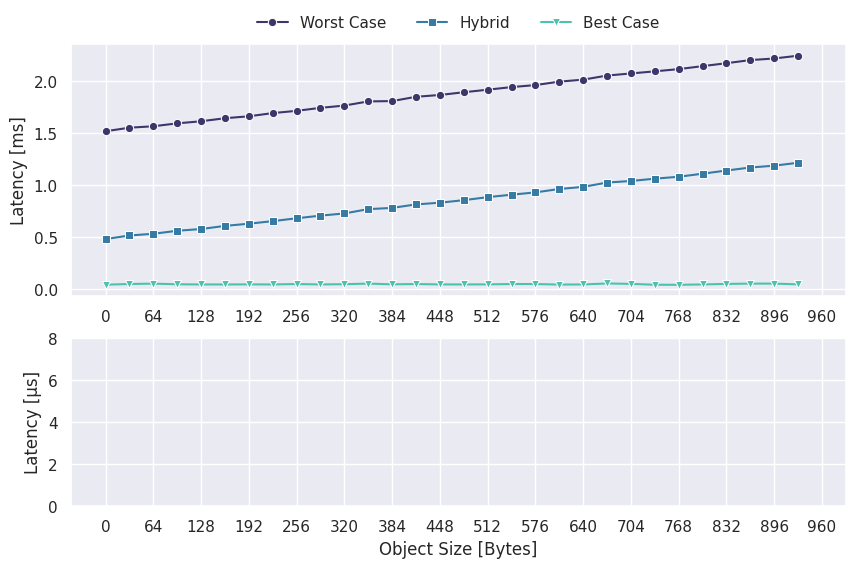

In [8]:
from util.plot import set_grid, save_plot, set_theme
from util.convert import scale_data
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

set_theme()

fig = plt.figure(1)
fig.set_figheight(6)
fig.set_figwidth(10)

gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[1.5, 1]) 
ax = plt.subplot(gs[0])

unit = "ms"

if enable_storage_reference and len(storage_write) != 0:
    storage_write_scaled = scale_data(storage_write, unit)
    sns.lineplot(ax=ax, x=storage_write_scaled["options.object_size"], y=storage_write_scaled["mean"], label="Raw Write", markers=["o"], marker="X", color="#aaaaaa")


if len(get_max2) != 0:
    get_max2_scaled = scale_data(get_max2, unit)
    sns.lineplot(ax=ax, x=get_max2_scaled["options.object_size"], y=get_max2_scaled["mean"], label="Worst Case", markers=["o"], marker="o")
    ax.fill_between(get_max2_scaled["options.object_size"], get_max2_scaled["min"], get_max2_scaled["max"], alpha=0.2, **fill_between_args)

if len(get_case1) != 0:
    get_case1_scaled = scale_data(get_case1, unit)
    sns.lineplot(ax=ax, x=get_case1_scaled["options.object_size"], y=get_case1_scaled["mean"], label="Hybrid", markers=["o"], marker="s")
    ax.fill_between(get_case1_scaled["options.object_size"], get_case1_scaled["min"], get_case1_scaled["max"], alpha=0.2, **fill_between_args)

if len(get_min) != 0:
    get_min_scaled = scale_data(get_min, unit)
    sns.lineplot(ax=ax, x=get_min_scaled["options.object_size"], y=get_min_scaled["mean"], label="Best Case", markers=["o"], marker="v")
    ax.fill_between(get_min_scaled["options.object_size"], get_min_scaled["min"], get_min_scaled["max"], alpha=0.2, **fill_between_args)

set_grid(64, max(get_min["options.object_size"].max(), get_max1["options.object_size"].max(), get_max2["options.object_size"].max()), ax)

ax.set_xlabel(None)
ax.set_ylabel(f"Latency [{unit}]")
# ax.set_ylim(bottom=-5, top=100)

if enable_storage_reference:
    handles, labels = plt.gca().get_legend_handles_labels()
    handles.append(handles.pop(0))
    labels.append(labels.pop(0))
    plt.legend(handles, labels, loc = "lower center", bbox_to_anchor=(.5, 1), ncol=len(ax.legend().get_lines()), title=None, frameon=False) 
else:
    ax.legend(loc = "lower center", bbox_to_anchor=(.5, 1), ncol=len(ax.legend().get_lines()), title=None, frameon=False)


set_theme(3, 2)
ax = plt.subplot(gs[1])

# fig, ax = plt.subplots()
# fig.set_figheight(2.5)
# fig.set_figwidth(10)

unit = "µs"

#if len(get_max2) != 0:
#    get_max2_scaled = scale_data(get_max2, unit)
#    sns.lineplot(ax=ax, x=get_max2_scaled["options.object_size"], y=get_max2_scaled["mean"], label="Worst Case", markers=["o"], marker="o")
#    ax.fill_between(get_max2_scaled["options.object_size"], get_max2_scaled["min"], get_max2_scaled["max"], alpha=0.2, **fill_between_args)

if len(get_case1) != 0:
    get_case1_scaled = scale_data(get_case1, unit)
    sns.lineplot(ax=ax, x=get_case1_scaled["options.object_size"], y=get_case1_scaled["mean"], label="Additional Example", markers=["o"], marker="s")
    ax.fill_between(get_case1_scaled["options.object_size"], get_case1_scaled["min"], get_case1_scaled["max"], alpha=0.2, **fill_between_args)

if enable_storage_reference and len(storage_write) != 0:
    storage_write_scaled = scale_data(storage_write, unit)
    sns.lineplot(ax=ax, x=storage_write_scaled["options.object_size"], y=storage_write_scaled["mean"], label="Raw Write", markers=["o"], marker="X", color="#aaaaaa")

if len(get_min) != 0:
    get_min_scaled = scale_data(get_min, unit)
    sns.lineplot(ax=ax, x=get_min_scaled["options.object_size"], y=get_min_scaled["mean"], label="Best Case", markers=["o"], marker="v")
    ax.fill_between(get_min_scaled["options.object_size"], get_min_scaled["min"], get_min_scaled["max"], alpha=0.2, **fill_between_args)

set_grid(64, max(get_min["options.object_size"].max(), get_max1["options.object_size"].max(), get_max2["options.object_size"].max()), ax)

ax.set_xlabel("Object Size [Bytes]")
ax.set_ylabel(f"Latency [{unit}]")
ax.set_ylim(bottom=0, top=8)
ax.get_legend().remove()

save_plot("get_ref", save_asset=True)

# Same Plot in Presentation Style

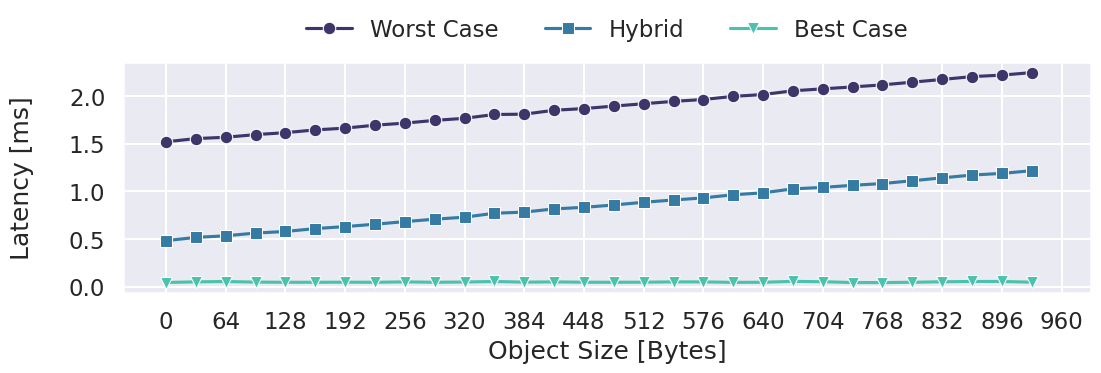

In [9]:
from util.plot import set_grid, save_plot, set_theme
from util.convert import scale_data
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

set_theme()
sns.set_context(context="talk")

fig = plt.figure(1)
fig.set_figheight(3)
fig.set_figwidth(12.5)

gs = gridspec.GridSpec(nrows=1, ncols=1) 
ax = plt.subplot(gs[0])

unit = "ms"

if enable_storage_reference and len(storage_write) != 0:
    storage_write_scaled = scale_data(storage_write, unit)
    sns.lineplot(ax=ax, x=storage_write_scaled["options.object_size"], y=storage_write_scaled["mean"], label="Raw Write", markers=["o"], marker="X", color="#aaaaaa")


if len(get_max2) != 0:
    get_max2_scaled = scale_data(get_max2, unit)
    sns.lineplot(ax=ax, x=get_max2_scaled["options.object_size"], y=get_max2_scaled["mean"], label="Worst Case", markers=["o"], marker="o")
    ax.fill_between(get_max2_scaled["options.object_size"], get_max2_scaled["min"], get_max2_scaled["max"], alpha=0.2, **fill_between_args)

if len(get_case1) != 0:
    get_case1_scaled = scale_data(get_case1, unit)
    sns.lineplot(ax=ax, x=get_case1_scaled["options.object_size"], y=get_case1_scaled["mean"], label="Hybrid", markers=["o"], marker="s")
    ax.fill_between(get_case1_scaled["options.object_size"], get_case1_scaled["min"], get_case1_scaled["max"], alpha=0.2, **fill_between_args)

if len(get_min) != 0:
    get_min_scaled = scale_data(get_min, unit)
    sns.lineplot(ax=ax, x=get_min_scaled["options.object_size"], y=get_min_scaled["mean"], label="Best Case", markers=["o"], marker="v")
    ax.fill_between(get_min_scaled["options.object_size"], get_min_scaled["min"], get_min_scaled["max"], alpha=0.2, **fill_between_args)

set_grid(64, max(get_min["options.object_size"].max(), get_max1["options.object_size"].max(), get_max2["options.object_size"].max()), ax)

if enable_storage_reference:
    handles, labels = plt.gca().get_legend_handles_labels()
    handles.append(handles.pop(0))
    labels.append(labels.pop(0))
    plt.legend(handles, labels, loc = "lower center", bbox_to_anchor=(.5, 1), ncol=len(ax.legend().get_lines()), title=None, frameon=False) 
else:
    ax.legend(loc = "lower center", bbox_to_anchor=(.5, 1), ncol=len(ax.legend().get_lines()), title=None, frameon=False)


set_grid(64, max(get_min["options.object_size"].max(), get_max1["options.object_size"].max(), get_max2["options.object_size"].max()), ax)

ax.set_xlabel("Object Size [Bytes]")
ax.set_ylabel(f"Latency [{unit}]", labelpad=25)

plt.savefig(f"../figures/get_ref_presentation_1.pdf", bbox_inches='tight', facecolor='#fafafa')

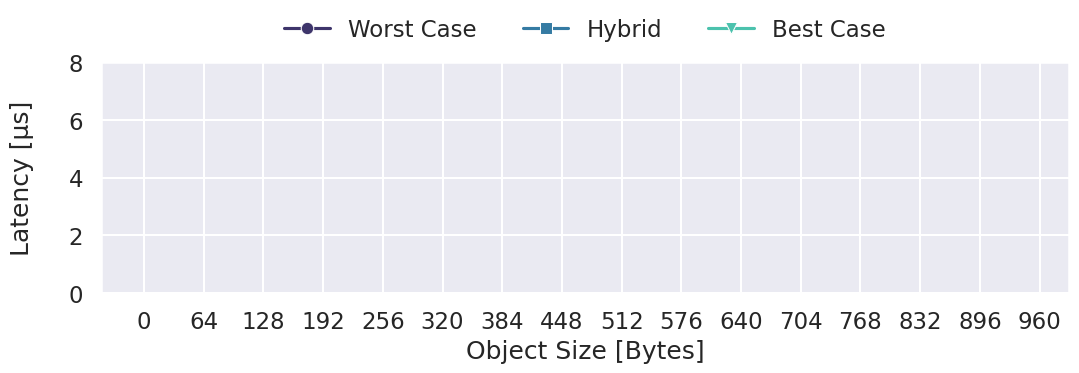

In [10]:
from util.plot import set_grid, save_plot, set_theme
from util.convert import scale_data
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

set_theme()
sns.set_context(context="talk")

fig = plt.figure(1)
fig.set_figheight(3)
fig.set_figwidth(12.5)

gs = gridspec.GridSpec(nrows=1, ncols=1) 
ax = plt.subplot(gs[0])

# fig, ax = plt.subplots()
# fig.set_figheight(2.5)
# fig.set_figwidth(10)

unit = "µs"

if len(get_max2) != 0:
    get_max2_scaled = scale_data(get_max2, unit)
    sns.lineplot(ax=ax, x=get_max2_scaled["options.object_size"], y=get_max2_scaled["mean"], label="Worst Case", markers=["o"], marker="o")
    ax.fill_between(get_max2_scaled["options.object_size"], get_max2_scaled["min"], get_max2_scaled["max"], alpha=0.2, **fill_between_args)

if len(get_case1) != 0:
    get_case1_scaled = scale_data(get_case1, unit)
    sns.lineplot(ax=ax, x=get_case1_scaled["options.object_size"], y=get_case1_scaled["mean"], label="Hybrid", markers=["o"], marker="s")
    ax.fill_between(get_case1_scaled["options.object_size"], get_case1_scaled["min"], get_case1_scaled["max"], alpha=0.2, **fill_between_args)

if enable_storage_reference and len(storage_write) != 0:
    storage_write_scaled = scale_data(storage_write, unit)
    sns.lineplot(ax=ax, x=storage_write_scaled["options.object_size"], y=storage_write_scaled["mean"], label="Raw Write", markers=["o"], marker="X", color="#aaaaaa")

if len(get_min) != 0:
    get_min_scaled = scale_data(get_min, unit)
    sns.lineplot(ax=ax, x=get_min_scaled["options.object_size"], y=get_min_scaled["mean"], label="Best Case", markers=["o"], marker="v")
    ax.fill_between(get_min_scaled["options.object_size"], get_min_scaled["min"], get_min_scaled["max"], alpha=0.2, **fill_between_args)

if enable_storage_reference:
    handles, labels = plt.gca().get_legend_handles_labels()
    handles.append(handles.pop(0))
    labels.append(labels.pop(0))
    plt.legend(handles, labels, loc = "lower center", bbox_to_anchor=(.5, 1), ncol=len(ax.legend().get_lines()), title=None, frameon=False) 
else:
    ax.legend(loc = "lower center", bbox_to_anchor=(.5, 1), ncol=len(ax.legend().get_lines()), title=None, frameon=False)

set_grid(64, max(get_min["options.object_size"].max(), get_max1["options.object_size"].max(), get_max2["options.object_size"].max()), ax)

ax.set_xlabel("Object Size [Bytes]")
ax.set_ylabel(f"Latency [{unit}]", labelpad=25)
ax.set_ylim(bottom=0, top=8)

plt.savefig(f"../figures/get_ref_presentation_2.pdf", bbox_inches='tight', facecolor='#fafafa')